# Heights, Areas, Volumes

In [1]:
from prep_n_load import *
plt.rcParams["figure.figsize"] = (18,5)

Sun Jan  9 09:42:57 2022  UTC
6554 parcels loaded.


## Min & Max

In [2]:
print("Heights: {} min, {} max".format(parcels.height.min(), parcels.height.max()))
print("Areas:   {:.0f} min, {:.0f} max".format(parcels.area.min(), parcels.area.max()))
print("Volumes: {:.0f} min, {:.0f} max".format(parcels.voxvolume.min(), parcels.voxvolume.max()))

Heights: 6 min, 48 max
Areas:   16 min, 513 max
Volumes: 1532 min, 121968 max


## Simple histograms

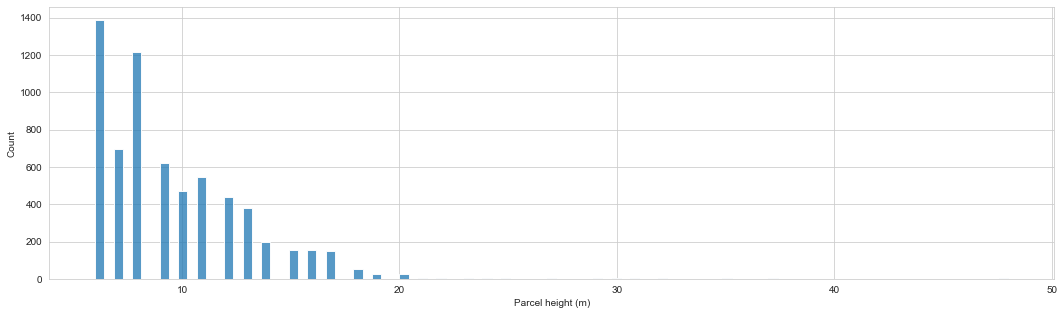

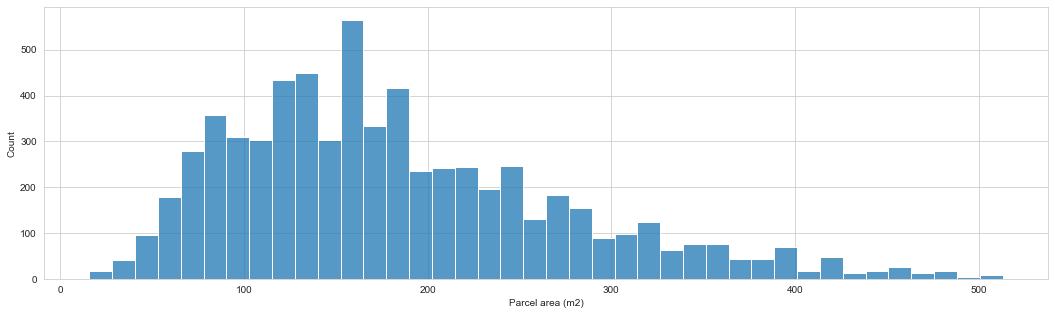

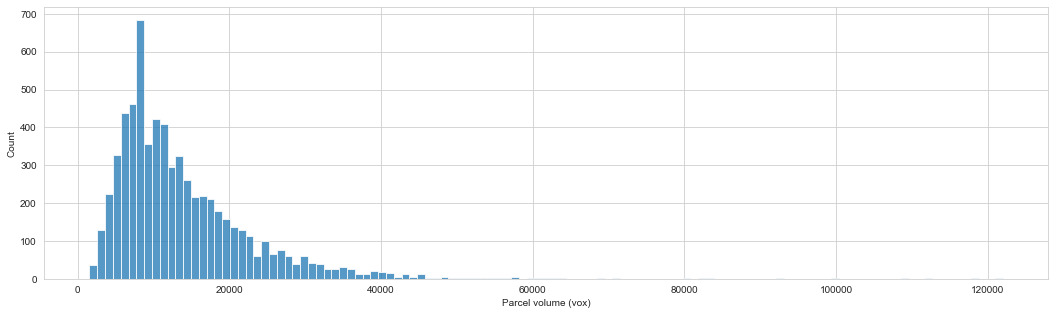

In [3]:
ax = sns.histplot(data=parcels.height)
ax.set(xlabel="Parcel height (m)")
plt.show()
ax = sns.histplot(data=parcels.area)
ax.set(xlabel="Parcel area (m2)")
plt.show()
ax = sns.histplot(data=parcels.voxvolume)
_ = ax.set(xlabel="Parcel volume (vox)")

## Zooming in on heights

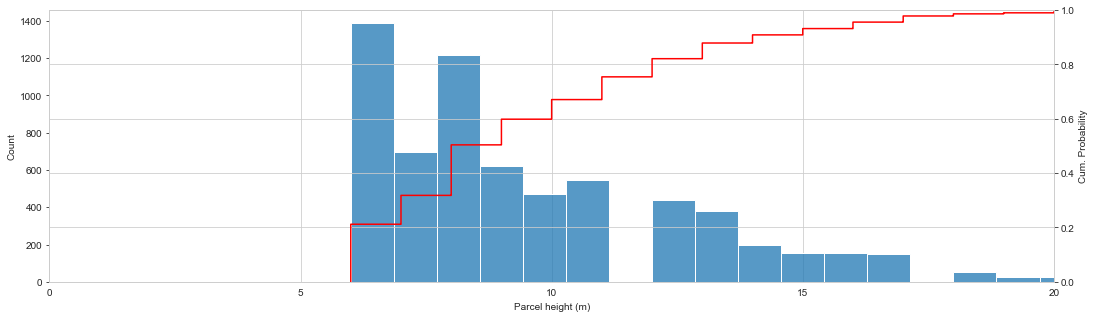

In [4]:
fig, ax = plt.subplots()
sns.histplot(data=parcels.height, ax=ax, bins=parcels.height.max()+1)
ax.set(xlabel="Parcel height (m)")
ax.set(xlim=(0, 20))
ax.grid(False, axis="y")
ax2 = ax.twinx()
sns.ecdfplot(data=parcels.height, ax=ax2, color="red")
ax2.set(xlim=(0, 20))
ax2.set(ylabel="Cum. Probability")
_ = plt.locator_params(axis="x", integer=True, tight=True)

* Most parcels have a height of 6.
* Note that looks like there are no parcels of hight ~13 but that just seems to be a strange artifact of how `histplot` bucketizes the data.

90% of parcels have height <= 14, i.e. with a height > 14 a parcel is in the top decile of all parcels:

In [13]:
print("Parcels with height <= 14: {:.1%}".format(parcels[parcels.height <= 14].id.count()/parcels.id.count()))

Parcels with height <= 14: 90.8%


This used to be a height of 13 last time. So CV has become slightly taller recently.

## Zooming in on volumes

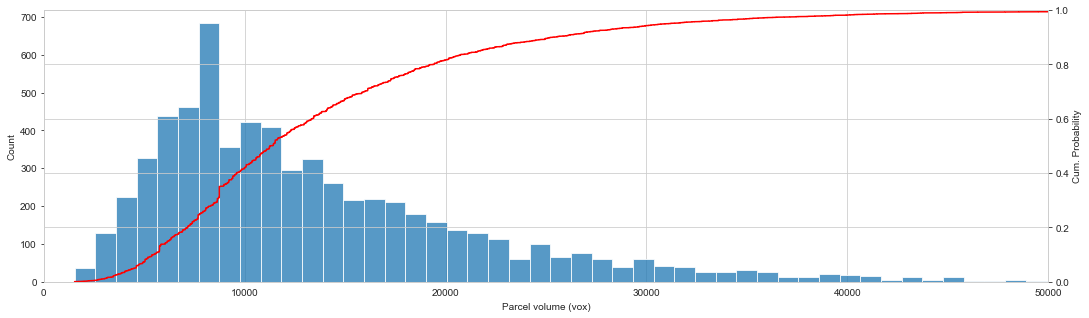

In [6]:
fig, ax = plt.subplots()
sns.histplot(data=parcels.voxvolume, ax=ax)
ax.set(xlabel="Parcel volume (vox)")
ax.set(xlim=(0, 50000))
ax.grid(False, axis="y")
ax2 = ax.twinx()
sns.ecdfplot(data=parcels.voxvolume, ax=ax2, color="red")
ax2.set(xlim=(0, 50000))
_ = ax2.set(ylabel="Cum. Probability")

* 80% of parcels with a volume < 20k vox.
* Anything beyond ~25-30k is in the top decile of volumes.

## Per island statistics

### Parcels per island

Without Origin City, which is currently an outlier with 3026 parcels.

c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49436 missing from current

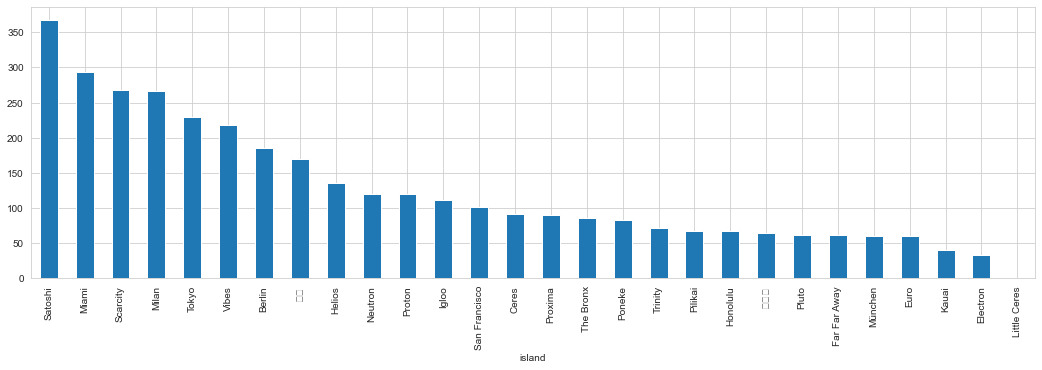

In [7]:
from matplotlib import font_manager
fontP = font_manager.FontProperties()
fontP.set_family('YaHei')
_ = island_sizes["parcels"].drop("Origin City").sort_values(ascending=False).plot(kind="bar")

### Heights distribution per island

c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26032 missing from current

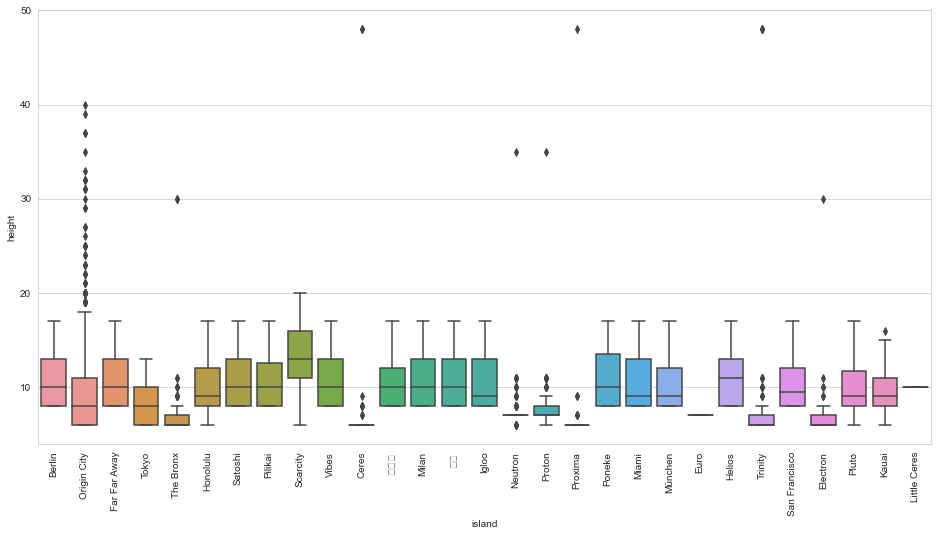

In [16]:
_, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
_ = sns.boxplot(ax=ax, x="island", y="height", data=parcels)

* Lots of uniform islands. But one of the most recent, Scarcity, has higher spread and highest median so far.

### Total volume per island

In megavoxels. Again, ignoring Origin City with 46 megavoxels.

c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49436 missing from current

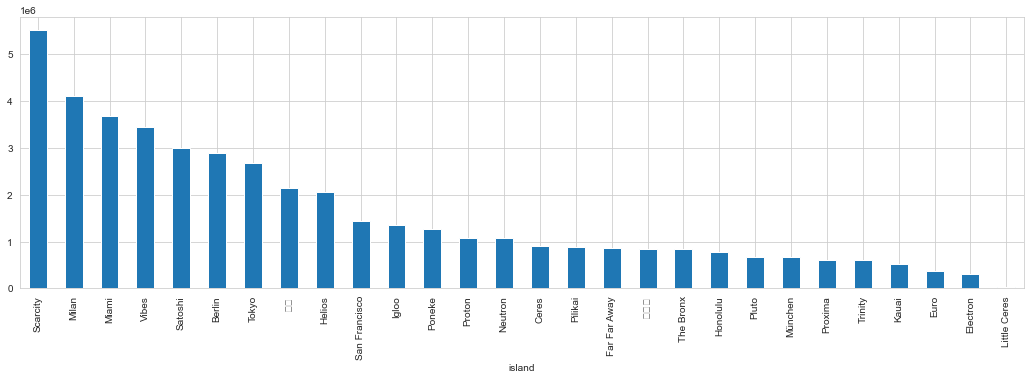

In [20]:
_ = island_sizes["voxvolume"].drop("Origin City").sort_values(ascending=False).plot(kind="bar")

### Volume distribution per island

c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\code\voxalytics\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26032 missing from current

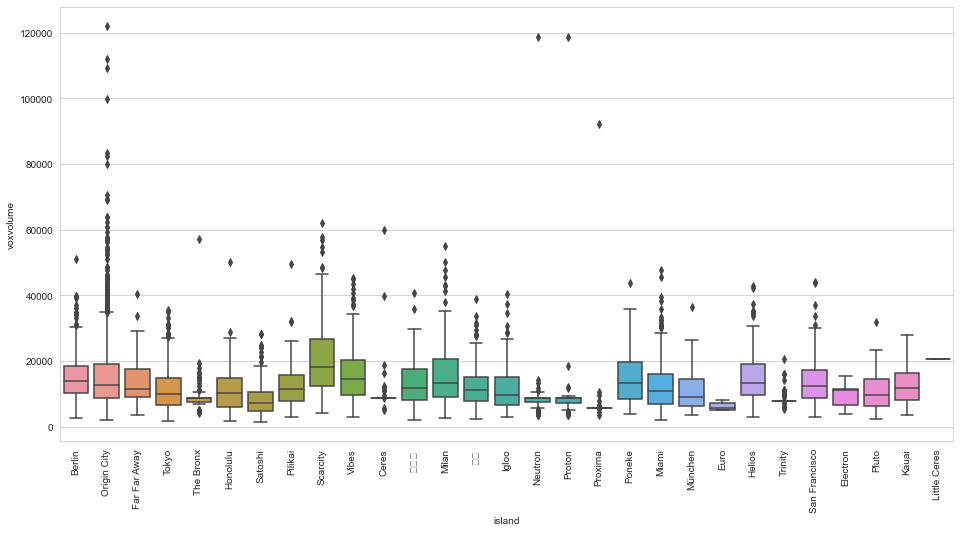

In [18]:
_, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
_ = sns.boxplot(ax=ax, x="island", y="voxvolume", data=parcels)

* Again, Scarcity with high spread and biggest median volume.

### Average voxel volume per parcel and island

In [11]:
island_sizes["voxperparcel"].sort_values(ascending=False)

island
Scarcity         20615.121577
Little Ceres     20480.000000
Vibes            15774.513177
Berlin           15524.222234
Milan            15431.095792
Origin City      15288.155981
Poneke           15225.747108
Helios           15182.813165
San Francisco    14071.863916
Far Far Away     13892.535105
新宿区              13214.118396
Pilikai          13041.584589
서울               12604.512693
Miami            12500.630960
Kauai            12495.226995
Igloo            12115.976788
Honolulu         11685.368722
Tokyo            11594.260866
München          11011.483609
Pluto            10867.558335
Ceres             9892.173913
The Bronx         9724.093023
Electron          9586.909091
Proton            9020.133333
Neutron           8944.333333
Trinity           8473.915493
Satoshi           8136.031218
Proxima           6817.244444
Euro              6133.866667
Name: voxperparcel, dtype: float64